In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns


### Reading the dataset

In [22]:
df_sample = pd.read_csv("SampleSuperstore.csv")

#### Cleaning and checking the dataset

In [23]:
df_sample.shape

(9994, 13)

In [24]:
df_sample.head()  #Here we can get an idea about the columns 

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### To get the columns in the data

In [26]:
df_sample.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

#### To get the categories of the data that are sold

In [27]:
df_sample["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

#### To get the sub-categories of the data that are sold

In [28]:
df_sample["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

#### To get the Segments to which items are sold

In [29]:
df_sample["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

#### To drop the postal code column

In [32]:
df_sample=df_sample.drop(columns=["Postal Code"], axis=1)

#### To check the different of shipment modes

In [37]:
df_sample["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

#### Number of products in each category

In [39]:
df_sample["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

#### Total number of items

In [41]:
df_sample["Category"].value_counts().sum()

9994

#### Number of products in each sub-category

In [42]:
df_sample["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

#### Types of regions

In [43]:
df_sample["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

#### Checking the states where items are to be delivered

In [44]:
df_sample["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

#### Now finding the unique cities

In [45]:
df_sample["City"].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

#### Number of varities in each colums

In [46]:
df_sample.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

#### Summary of the data

In [47]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


#### Statistical Summary

In [48]:
df_sample.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


#### Checking the null values in the dataset

In [49]:
df_sample.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [52]:
print("Total number of null values in the dataset = ",df_sample.isnull().sum().sum())

Total number of null values in the dataset =  0


#### Unique data in each column

In [54]:
for column in df_sample:
    print(df_sample[column].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 

#### Number of duplicate values in data set

In [56]:
df_sample.duplicated().sum()

50

#### Visualization of missing values


<AxesSubplot:>

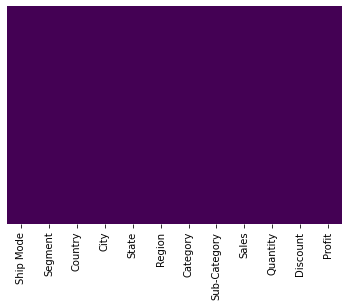

In [61]:
sns.heatmap(df_sample.isnull(),yticklabels=False,cbar = False,cmap="viridis")

#### Dropping duplicates

In [62]:
df_sample.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


#### Correlation among the columns

In [63]:
df_sample.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


#### Covariance between set of variables

In [64]:
df_sample.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


#### Summary of the data

In [65]:
df_sample.value_counts()

Ship Mode       Segment      Country        City           State         Region   Category         Sub-Category  Sales    Quantity  Discount  Profit   
Standard Class  Consumer     United States  Los Angeles    California    West     Office Supplies  Paper         19.440   3         0.0        9.3312      4
                Corporate    United States  Houston        Texas         Central  Office Supplies  Paper         15.552   3         0.2        5.4432      3
                Consumer     United States  San Francisco  California    West     Office Supplies  Paper         25.920   4         0.0        12.4416     2
                                            Detroit        Michigan      Central  Furniture        Chairs        389.970  3         0.0        35.0973     2
                                            Philadelphia   Pennsylvania  East     Office Supplies  Paper         20.736   4         0.2        7.2576      2
                                                               

### Visualization of data

#### Bar plot between Sub-Category Vs Category

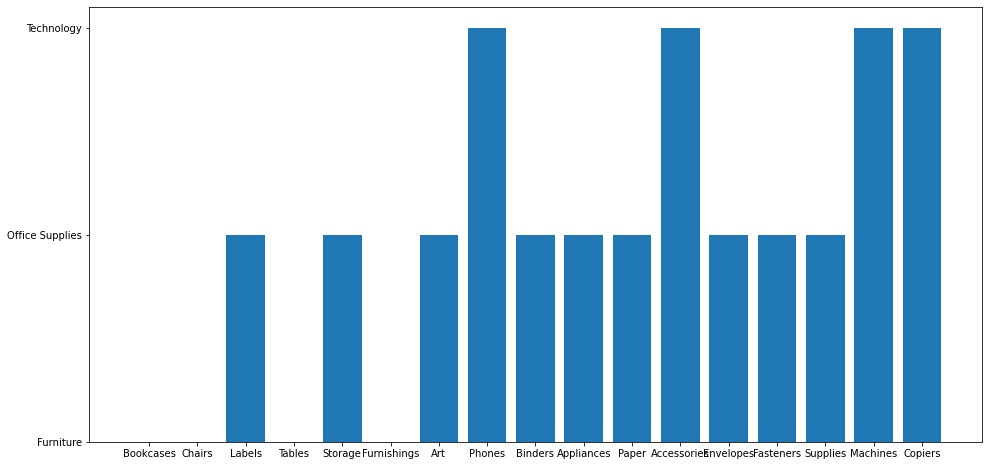

In [74]:
plt.figure(figsize=(16,8))
plt.bar("Sub-Category","Category", data=df_sample)
plt.show()

* In furniture category the frequency of individual item is very less.
* In office supplies the frequency of individual item is medium.
* In technology the frequency of individual.

#### Pie Plot of Sub-Category

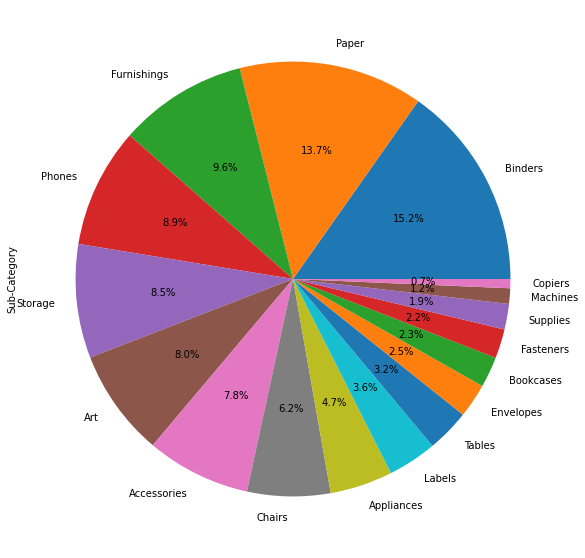

In [75]:
plt.figure(figsize=(12,10))
df_sample["Sub-Category"].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

#### Bar plot of Sales Vs Profit

C:\Users\bhakt\AppData\Local\Temp\ipykernel_8852\2249389084.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sample.groupby("Sub-Category")["Profit","Sales"].agg(["sum"]).plot.bar()


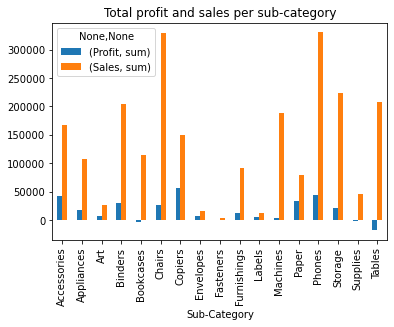

In [78]:
df_sample.groupby("Sub-Category")["Profit","Sales"].agg(["sum"]).plot.bar()
plt.title("Total profit and sales per sub-category")
plt.rcParams['figure.figsize']=[10,8]
plt.show()

* HIGHEST PROFIT - COPIERS   SELLING PRICES - CHAIRS ANF PHONES
* LOSS IN TABLES AND BOOKCASES

#### Sales and Profit Region Wise

C:\Users\bhakt\AppData\Local\Temp\ipykernel_8852\1202121288.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sample.groupby("Region")["Profit","Sales"].agg(['sum']).plot.bar()


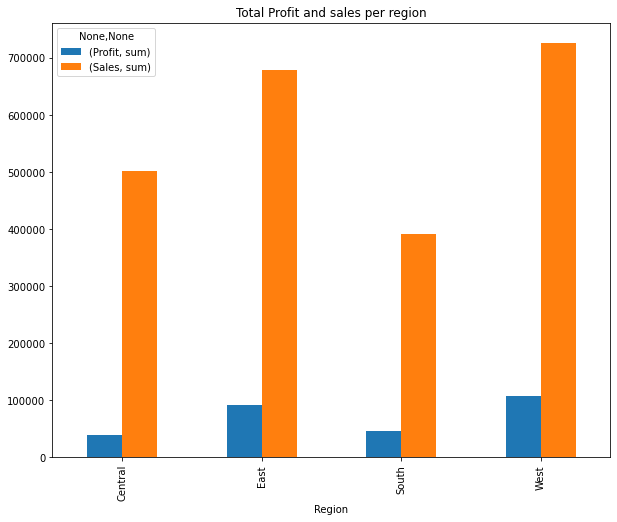

In [80]:
df_sample.groupby("Region")["Profit","Sales"].agg(['sum']).plot.bar()
plt.title('Total Profit and sales per region')
plt.rcParams['figure.figsize']=[10,8]
plt.show()

* In Central and West the profit is less in comparision to sales
* In South the sales is less comparatively in rest of regions

#### Count plot of Sub-Categories

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


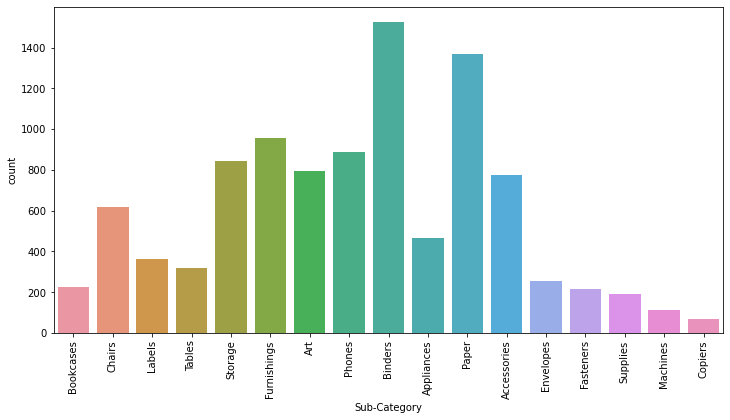

In [85]:
print(df_sample['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x = df_sample['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

#### Heat map of Correlation among the columns

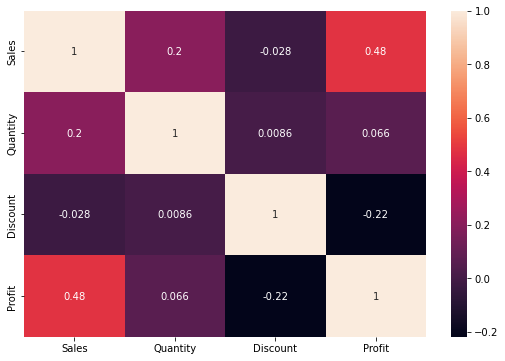

In [87]:
fig,axes=plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df_sample.corr(), annot=True)
plt.show()

#### Count plot of Segment

<AxesSubplot:xlabel='Segment', ylabel='count'>

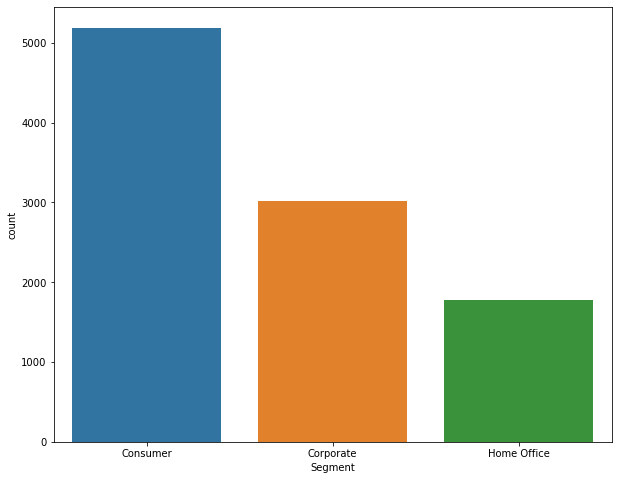

In [88]:
sns.countplot(x=df_sample['Segment'])

#### Count plot of Region

<AxesSubplot:xlabel='Region', ylabel='count'>

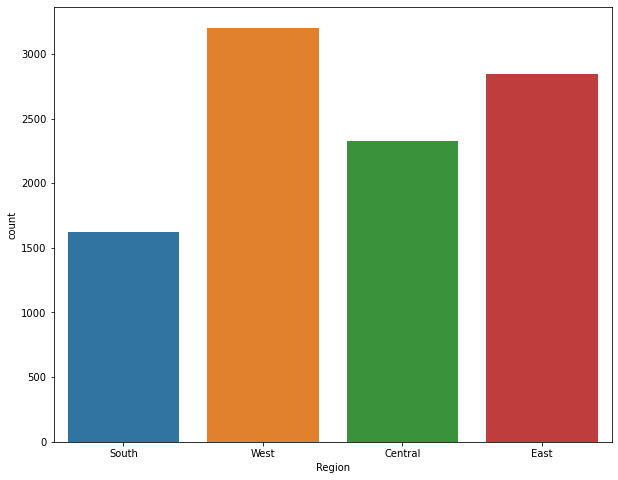

In [89]:
sns.countplot(x=df_sample['Region'])

#### Bar Plot of Sub-Category Vs Profit

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

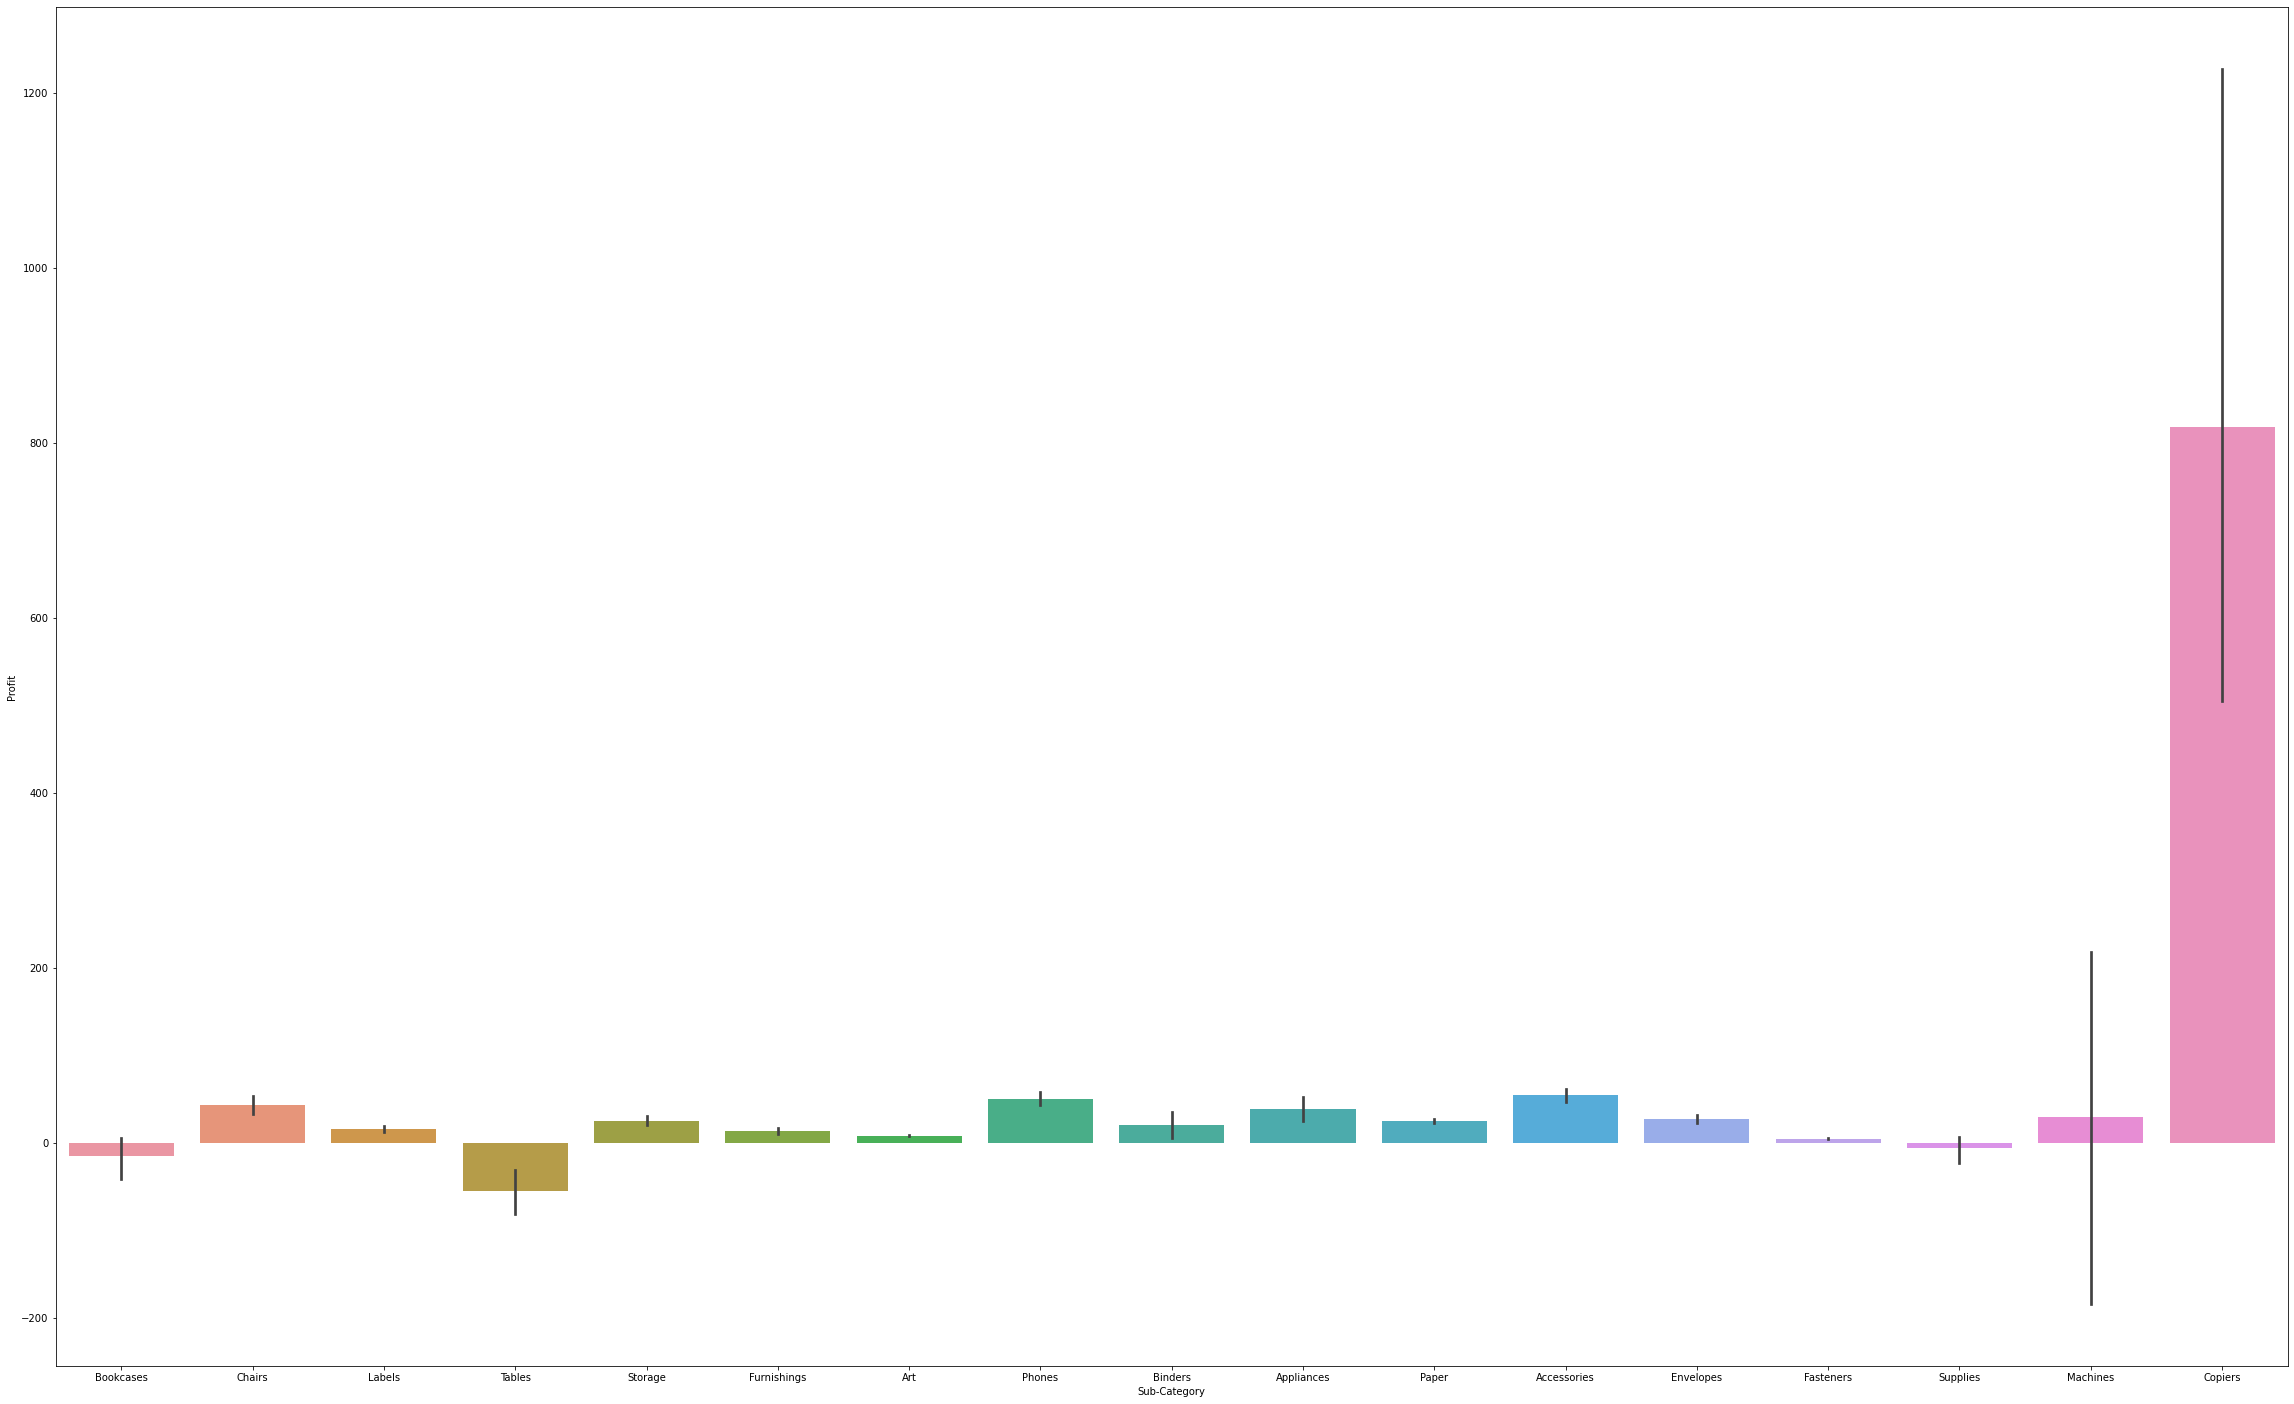

In [91]:
plt.figure(figsize=(40,25))
sns.barplot(x=df_sample['Sub-Category'],y=df_sample['Profit'])

#### Line plot of Discount vs Profit

C:\Users\bhakt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


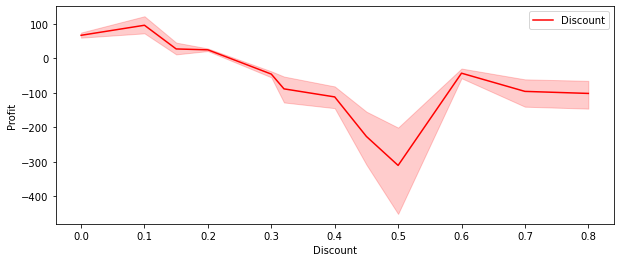

In [92]:
plt.figure(figsize =(10,4))
sns.lineplot("Discount","Profit",data=df_sample, color ='r', label="Discount")
plt.legend()

#### Histogram of data

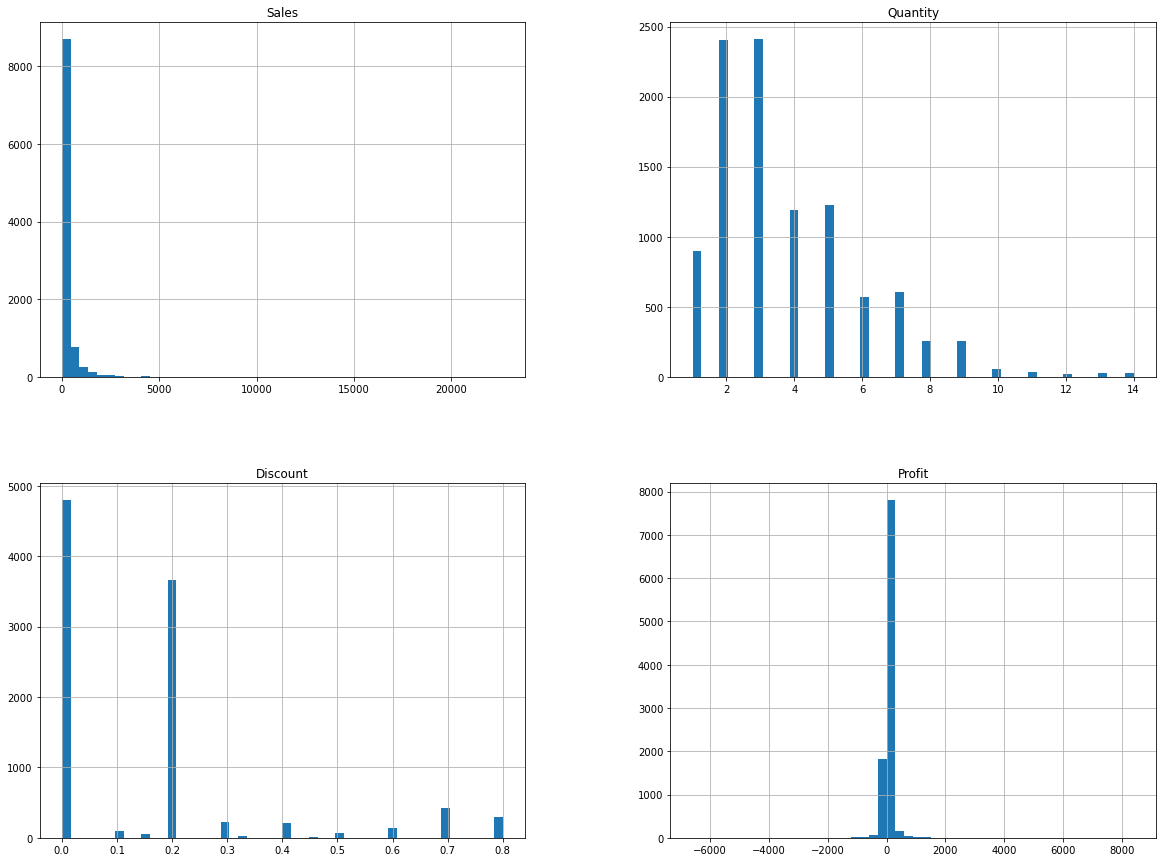

In [93]:
df_sample.hist(bins=50,figsize=(20,15))
plt.show()

#### Pair Plot of Sub-Category

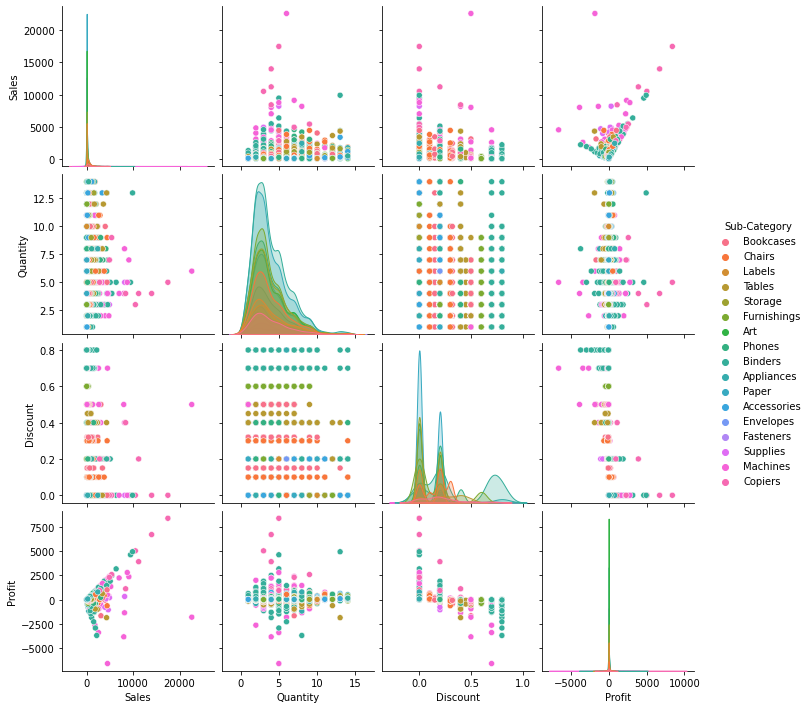

In [94]:
figsize=(15,10)
sns.pairplot(df_sample,hue='Sub-Category')

#### Summary of the data

In [97]:
summary=pd.DataFrame(df_sample.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
summary

C:\Users\bhakt\AppData\Local\Temp\ipykernel_8852\3292021784.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary=pd.DataFrame(df_sample.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())


,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


#### Statistical Summary of the data

In [98]:
df_sample.groupby("State").Profit.agg(['sum','mean','min','max','count','median','std',
                                      'var'])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


#### Pair Plot of data

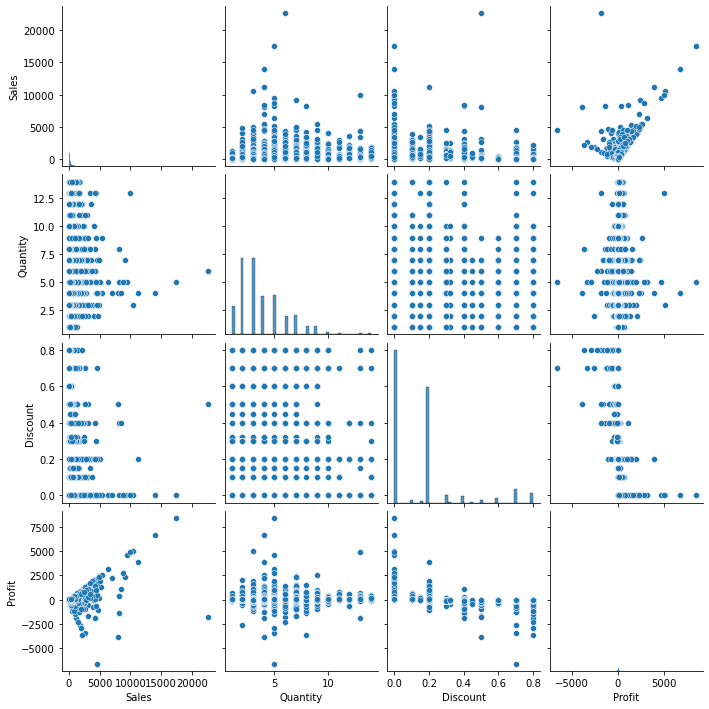

In [99]:
sns.pairplot(df_sample)

#### Box Plot of the sales

C:\Users\bhakt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

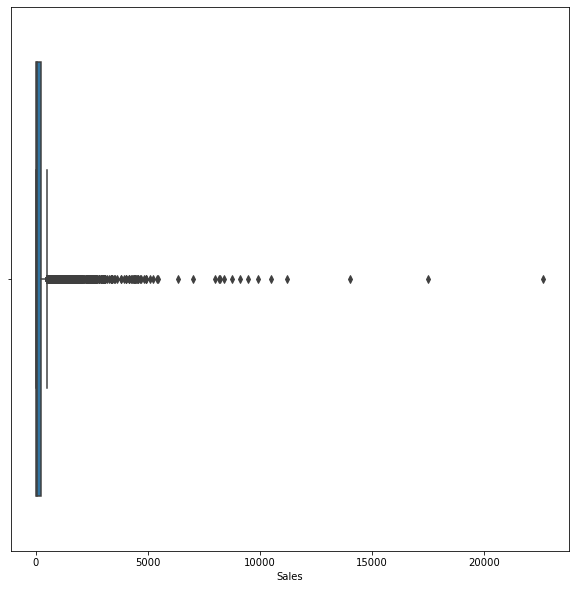

In [100]:
fig,axex = plt.subplots(figsize=(10,10))
sns.boxplot(df_sample['Sales'])

#### Box plot od DIscount

C:\Users\bhakt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount'>

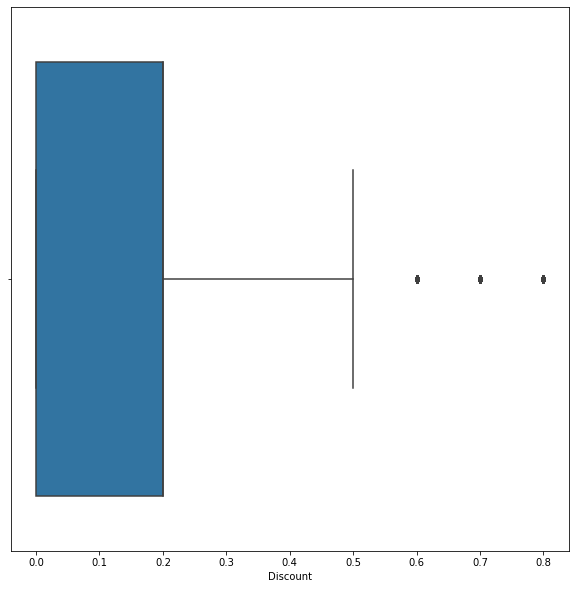

In [101]:
fig, axes = plt.subplots(figsize=(10,10))
sns.boxplot(df_sample['Discount'])

#### Box plot of the Profit

C:\Users\bhakt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

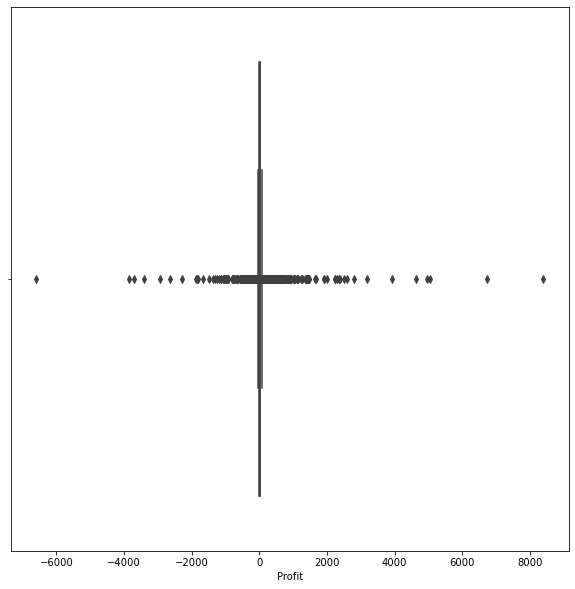

In [105]:
fig, axes = plt.subplots(figsize=(10,10))
sns.boxplot(df_sample['Profit'])

In [106]:
Q1 = df_sample.quantile(q=0.25,axis =0, numeric_only=True, interpolation ='linear')
Q3 = df_sample.quantile(q=0.75,axis=0,numeric_only = True, interpolation ='linear')

In [107]:
IQR = Q3-Q1
print(IQR)

Sales       192.66000
Quantity      3.00000
Discount      0.20000
Profit       27.63525
dtype: float64


<AxesSubplot:xlabel='Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit'>

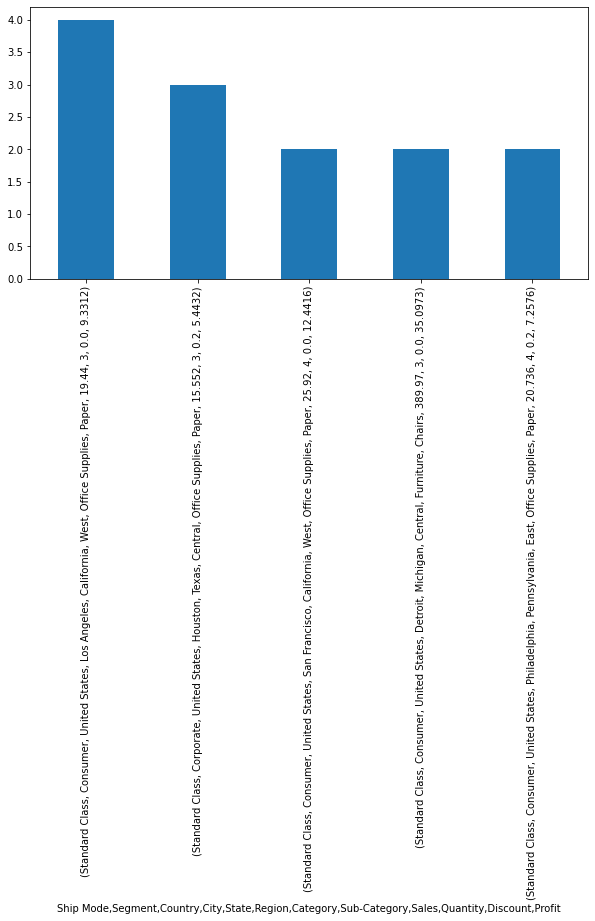

In [108]:
df_sample.value_counts().nlargest().plot(kind='bar',figsize=(10,5))

#### Plot of Value Counts

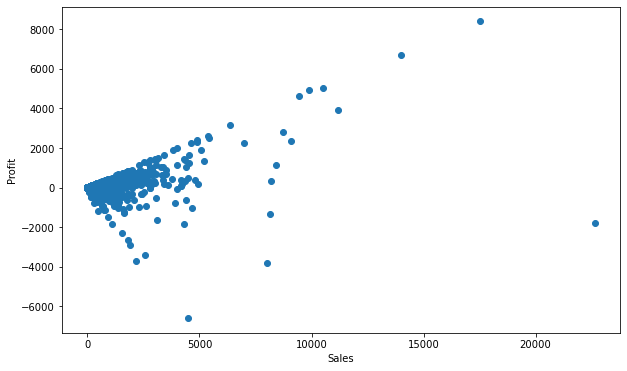

In [109]:
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(df_sample["Sales"],df_sample["Profit"])
ax.set_xlabel("Sales")
ax.set_ylabel("Profit")
plt.show()

#### Sales statistical data

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


C:\Users\bhakt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


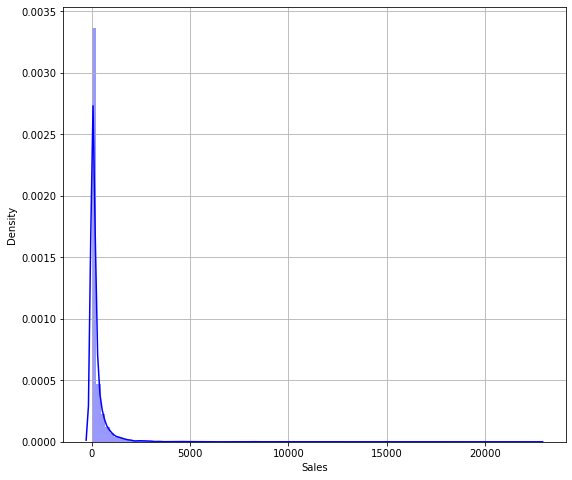

In [112]:
print(df_sample['Sales'].describe())
plt.figure(figsize=(9,8))
plt.grid()
sns.distplot(df_sample['Sales'],color ='b',bins =100,hist_kws={'alpha':0.4});

#### Box plot of Sales. Quantity, Discount and Profit

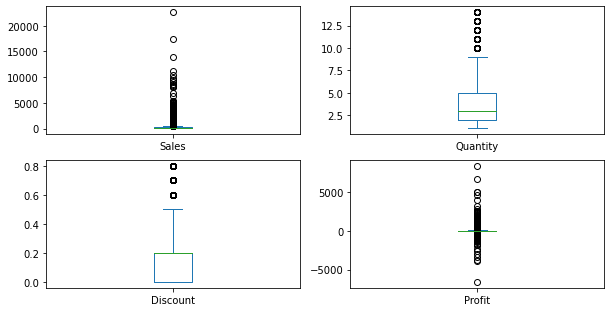

In [114]:
df_sample.plot(kind='box',subplots=True, layout=(3,2), sharex=False, sharey=False)
plt.rcParams['figure.figsize']=[14,12]
plt.show()

#### Clustering of Data

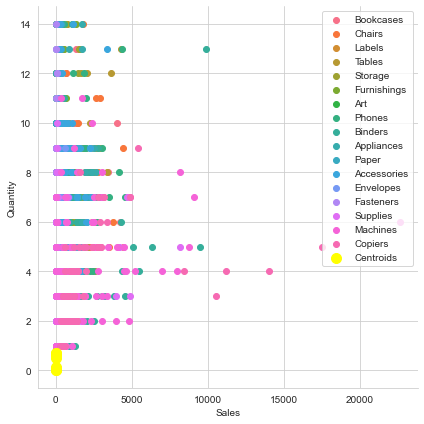

In [125]:
x = df_sample.iloc[:, [9, 10, 11]].values
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter= 300,n_init = 10, random_state=0).fit(x)
    wcss.append(kmeans.inertia_)
sns.set_style("whitegrid")
sns.FacetGrid(df_sample, hue = "Sub-Category", height =6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100,c="yellow",label="Centroids")

plt.rcParams['figure.figsize']=[10,8]
plt.legend()
           

* 